# Lab 6:  Train Various Regression Models and Compare Their Performances

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In this lab assignment, you will train various regression models (regressors) and compare their performances. You will train, test and evaluate individual models as well as ensemble models. You will:

1. Build your DataFrame and define your ML problem:
    * Load the Airbnb "listings" data set
    * Define the label - what are you predicting?
    * Identify the features
2. Create labeled examples from the data set.
3. Split the data into training and test data sets.
4. Train, test and evaluate two individual regressors.
5. Use the stacking ensemble method to train the same regressors.
6. Train, test and evaluate Gradient Boosted Decision Trees.
7. Train, test and evaluate Random Forest.
8. Visualize and compare the performance of all of the models.

<font color='red'><b>Note:</font><br> 
<font color='red'><b>1. Some of the code cells in this notebook may take a while to run.</font><br>
<font color='red'><b>2. Ignore warning messages that pertain to deprecated packages.</font>

## Part 1. Build Your DataFrame and Define Your ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the data set ``airbnbData_train``. This data set already has all the necessary preprocessing steps implemented, including one-hot encoding of the categorical variables, scaling of all numerical variable values, and imputing missing values. It is ready for modeling.

<b>Task</b>: In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`.

You will be working with the file named "airbnbData_train.csv" that is located in a folder named "data_regressors".

In [2]:
file_path = "data_regressors/airbnbData_train.csv"
df = pd.read_csv(file_path)

#### Define the Label

Your goal is to train a machine learning model that predicts the price of an Airbnb listing. This is an example of supervised learning and is a regression problem. In our dataset, our label will be the `price` column and the label contains continuous values.

#### Evaluation Metrics for Regressors

So far, we have mostly focused on classification problems. For this assignment, we will focus on a regression problem and predict a continuous outcome. There are different evaluation metrics that are used to determine the performance of a regressor. We will use two metrics to evaluate our regressors: RMSE (root mean square error) and $R^2$ (coefficient of determination).

RMSE:<br>
RMSE finds the average difference between the predicted values and the actual values. We will compute the RMSE on the test set.  To compute the RMSE, we will use the scikit-learn ```mean_squared_error()``` function. Since RMSE finds the difference between the predicted and actual values, lower RMSE values indicate good performance - the model fits the data well and makes more accurate predictions. On the other hand, higher RSME values indicate that the model is not performing well.

$R^2$:<br>
$R^2$ is a measure of the proportion of variability in the prediction that the model was able to make using the test data. An $R^2$ value of 1 is perfect and 0 implies no explanatory value. We can use scikit-learn's ```r2_score()``` function to compute it. Since $R^2$ measures how well the model fits the data, a higher $R^2$ value indicates that good performance and a lower $R^2$ indicates that poor performance.

#### Identify Features

Our features will be all of the remaining columns in the dataset.

## Part 2. Create Labeled Examples from the Data Set 

<b>Task</b>: In the code cell below, create labeled examples from DataFrame `df`.

In [3]:
X = df.drop(columns = ['price']) 
y = df['price']

## Part 3. Create Training and Test Data Sets

<b>Task</b>: In the code cell below, create training and test sets out of the labeled examples. Create a test set that is 30 percent of the size of the data set. Save the results to variables `X_train, X_test, y_train, y_test`.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Part 4: Train, Test and Evaluate Two Regression Models: Linear Regression and Decision Tree

### a. Train, Test and Evaluate a Linear Regression

You will use the scikit-learn `LinearRegression` class to create a linear regression model. For more information, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

First let's import `LinearRegression`:

In [5]:
from sklearn.linear_model import LinearRegression

<b>Task</b>: Initialize a scikit-learn `LinearRegression` model object with no arguments, and fit the model to the training data. The model object should be named `lr_model`.

In [6]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

<b>Task:</b> Test your model on the test set (`X_test`). Call the ``predict()`` method  to use the fitted model to generate a vector of predictions on the test set. Save the result to the variable ``y_lr_pred``.

In [7]:
# Call predict() to use the fitted model to make predictions on the test data
y_lr_pred = lr_model.predict(X_test)
y_lr_pred

array([ 0.32666016, -1.0201416 , -0.1361084 , ..., -0.75253296,
       -0.47903442, -0.34671021])

To compute the RMSE, we will use the scikit-learn ```mean_squared_error()``` function, which computes the mean squared error between the predicted values and the actual values: ```y_lr_pred``` and```y_test```. In order to obtain the root mean squared error, we will specify the parameter `squared=False`. 

To compute the $R^2$, we will use the scikit-learn ```r2_score()``` function. 

<b>Task</b>: In the code cell below, do the following:

1. Call the `mean_squared_error()` function with arguments `y_test` and `y_lr_pred` and the parameter `squared=False` to find the RMSE. Save your result to the variable `lr_rmse`.

2. Call the `r2_score()` function with the arguments `y_test` and `y_lr_pred`.  Save the result to the variable `lr_r2`.

In [8]:
# 1. Compute the RMSE using mean_squared_error()
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared = False)

# 2. Compute the R2 score using r2_score()
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.7218232873640288
[LR] R2: 0.4592361272689869


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### b. Train, Test and Evaluate a Decision Tree Using GridSearch

You will use the scikit-learn `DecisionTreeRegressor` class to create a decision tree regressor. For more information, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

First let's import `DecisionTreeRegressor`:

In [9]:
from sklearn.tree import DecisionTreeRegressor

#### Set Up a Parameter Grid 

<b>Task</b>: Create a dictionary called `param_grid` that contains possible hyperparameter values for `max_depth` and `min_samples_leaf`. The dictionary should contain the following key/value pairs:

* a key called 'max_depth' with a value which is a list consisting of the integers 4 and 8
* a key called 'min_samples_leaf' with a value which is a list consisting of the integers 25 and 50

In [10]:
param_grid = {
    'max_depth': [4, 8],
    'min_samples_leaf': [25, 50]
}

<b>Task:</b> Use `GridSearchCV` to fit a grid of decision tree regressors and search over the different values of hyperparameters `max_depth` and `min_samples_leaf` to find the ones that results in the best 3-fold cross-validation (CV) score.


You will pass the following arguments to `GridSearchCV()`:

1. A decision tree **regressor** model object.
2. The `param_grid` variable.
3. The number of folds (`cv=3`).
4. The scoring method `scoring='neg_root_mean_squared_error'`. Note that `neg_root_mean_squared_error` returns the negative RMSE.


Complete the code in the cell below.

In [11]:
print('Running Grid Search...')

# 1. Create a DecisionTreeRegressor model object without supplying arguments. 
#    Save the model object to the variable 'dt_regressor'

dt_regressor = DecisionTreeRegressor()

# 2. Run a Grid Search with 3-fold cross-validation and assign the output to the object 'dt_grid'.
#    * Pass the model and the parameter grid to GridSearchCV()
#    * Set the number of folds to 3
#    * Specify the scoring method

dt_grid = GridSearchCV(estimator = dt_regressor, param_grid = param_grid, cv = 3, scoring = 'neg_root_mean_squared_error')

# 3. Fit the model (use the 'grid' variable) on the training data and assign the fitted model to the 
#    variable 'dt_grid_search'

dt_grid_search = dt_grid.fit(X_train, y_train)

print('Done')


Running Grid Search...
Done


The code cell below prints the RMSE score of the best model using the `best_score_` attribute of the fitted grid search object `dt_grid_search`. Note that specifying a scoring method of `neg_root_mean_squared_error` will result in the negative RMSE, so we will multiply `dt_grid_search.best_score` by -1 to obtain the RMSE.

In [12]:
rmse_DT = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT) )

[DT] RMSE for the best model is : 0.72


<b>Task</b>: In the code cell below, obtain the best model hyperparameters identified by the grid search and save them to the variable `dt_best_params`.

In [13]:
dt_best_params = dt_grid_search.best_params_
dt_best_params

{'max_depth': 8, 'min_samples_leaf': 25}

<b>Task</b>: In the code cell below, initialize a `DecisionTreeRegressor` model object, supplying the best values of hyperparameters `max_depth` and `min_samples_leaf` as arguments.  Name the model object `dt_model`. Then fit the model `dt_model` to the training data.

In [14]:
dt_model = DecisionTreeRegressor(max_depth = dt_best_params['max_depth'], min_samples_leaf = dt_best_params['min_samples_leaf'])

dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)

<b>Task:</b> Test your model `dt_model` on the test set `X_test`. Call the ``predict()`` method  to use the fitted model to generate a vector of predictions on the test set. Save the result to the variable ``y_dt_pred``. Evaluate the results by computing the RMSE and R2 score in the same manner as you did above. Save the results to the variables `dt_rmse` and `dt_r2`.

Complete the code in the cell below to accomplish this.

In [15]:
# 1. Use the fitted model to make predictions on the test data
y_dt_pred = dt_model.predict(X_test)

# 2. Compute the RMSE using mean_squared_error()
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared = False)

# 3. Compute the R2 score using r2_score()
dt_r2 = r2_score(y_test, y_dt_pred)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 0.7143583584073986
[DT] R2: 0.47036320040386304


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Part 5: Train, Test and Evaluate Ensemble Models: Stacking 

You will use the stacking ensemble method to train two regression models. You will use the scikit-learn `StackingRegressor` class. For more information, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html).

First let's import `StackingRegressor`:

In [16]:
from sklearn.ensemble import StackingRegressor

In this part of the assignment, we will use two models jointly. In the code cell below, we creates a list of tuples, each consisting of a scikit-learn model function and the corresponding shorthand name that we choose. We will specify the hyperparameters for the decision tree that we determined through the grid search above.

In [17]:
estimators = [("DT", DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)),
              ("LR", LinearRegression())
             ]

<b>Task</b>: 


1. Create a `StackingRegressor` model object. Call `StackingRegressor()` with the following parameters:
    * Assign the list `estimators` to the parameter `estimators`.
    * Use the parameter 'passthrough=False'. 
Assign the results to the variable `stacking_model`.

2. Fit `stacking_model` to the training data.

As you read up on the definition of the `StackingRegressor` class, you will notice that by default, the results of each model are combined using a ridge regression (a "final regressor").

In [18]:
print('Implement Stacking...')

estimators = [
    ('linear_regression', lr_model),
    ('decision_tree', dt_model)
]

# Create the StackingRegressor model
stacking_model = StackingRegressor(estimators=estimators, passthrough=False)

# Fit the model to the training data
stacking_model.fit(X_train, y_train)


print('End')

Implement Stacking...
End


<b>Task:</b> Use the `predict()` method to test your ensemble model `stacking_model` on the test set (`X_test`). Save the result to the variable `stacking_pred`. Evaluate the results by computing the RMSE and R2 score. Save the results to the variables `stack_rmse` and `stack_r2`.

Complete the code in the cell below to accomplish this.

In [19]:
# 1. Use the fitted model to make predictions on the test data
stacking_pred = stacking_model.predict(X_test)

# 2. Compute the RMSE 
stack_rmse = mean_squared_error(y_test, stacking_pred, squared = False)

# 3. Compute the R2 score
stack_r2 = r2_score(y_test, stacking_pred)
   
print('Root Mean Squared Error: {0}'.format(stack_rmse))
print('R2: {0}'.format(stack_r2))                       

Root Mean Squared Error: 0.6830144078559438
R2: 0.5158213653191397


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Part 6: Train, Test and Evaluate  Evaluate Ensemble Models: Gradient Boosted Decision Trees 

You will use the scikit-learn `GradientBoostingRegressor` class to create a gradient boosted decision tree. For more information, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html).

First let's import `GradientBoostingRegressor`:

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

Let's assume you already performed a grid search to find the best model hyperparameters for your gradient boosted decision tree. (We are omitting this step to save computation time.) The best values are: `max_depth=2`, and `n_estimators = 300`. 

<b>Task</b>: Initialize a `GradientBoostingRegressor` model object with the above values as arguments. Save the result to the variable `gbdt_model`. Fit the `gbdt_model` model to the training data.

In [21]:
print('Begin GBDT Implementation...')

gbdt_model = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 4, min_samples_split = 2, min_samples_leaf = 1, random_state = 42)

gbdt_model.fit(X_train, y_train)

print('End')

Begin GBDT Implementation...
End


<b>Task:</b> Use the `predict()` method to test your model `gbdt_model` on the test set `X_test`. Save the result to the variable ``y_gbdt_pred``. Evaluate the results by computing the RMSE and R2 score in the same manner as you did above. Save the results to the variables `gbdt_rmse` and `gbdt_r2`.

Complete the code in the cell below to accomplish this.

In [22]:
# 1. Use the fitted model to make predictions on the test data
y_gbdt_pred = gbdt_model.predict(X_test)

# Compute RMSE
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)

# Compute R2 score


# 2. Compute the RMSE 
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared = False)

# 3. Compute the R2 score 
gbdt_r2 = r2_score(y_test, y_gbdt_pred)

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))                 

[GBDT] Root Mean Squared Error: 0.6225283566260418
[GBDT] R2: 0.5977795303865059


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Part 7: Train, Test and Evaluate  Ensemble Models: Random Forest

You will use the scikit-learn `RandomForestRegressor` class to create a gradient boosted decision tree. For more information, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

First let's import `RandomForestRegressor`:

In [23]:
from sklearn.ensemble import RandomForestRegressor

Let's assume you already performed a grid search to find the best model hyperparameters for your random forest model. (We are omitting this step to save computation time.) The best values are: `max_depth=32`, and `n_estimators = 300`. 

<b>Task</b>: Initialize a `RandomForestRegressor` model object with the above values as arguments. Save the result to the variable `rf_model`. Fit the `rf_model` model to the training data.

In [24]:
print('Begin RF Implementation...')

rf_model = RandomForestRegressor(max_depth = 32, n_estimators = 300, random_state = 42)

rf_model.fit(X_train, y_train)

print('End')

Begin RF Implementation...
End


<b>Task:</b> Use the `predict()` method to test your model `rf_model` on the test set `X_test`. Save the result to the variable ``y_rf_pred``. Evaluate the results by computing the RMSE and R2 score in the same manner as you did above. Save the results to the variables `rf_rmse` and `rf_r2`.

Complete the code in the cell below to accomplish this.

In [25]:
# 1. Use the fitted model to make predictions on the test data
y_rf_pred = rf_model.predict(X_test)

# 2. Compute the RMSE 
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared = False)

# 3. Compute the R2 score 
rf_r2 = r2_score(y_test, y_rf_pred)

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))                 

[RF] Root Mean Squared Error: 0.6202803980783841
[RF] R2: 0.600679133075964


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Part 8: Visualize and Compare Model Performance

The code cell below will plot the RMSE and R2 score for each regressor. 

<b>Task:</b> Complete the code in the cell below.

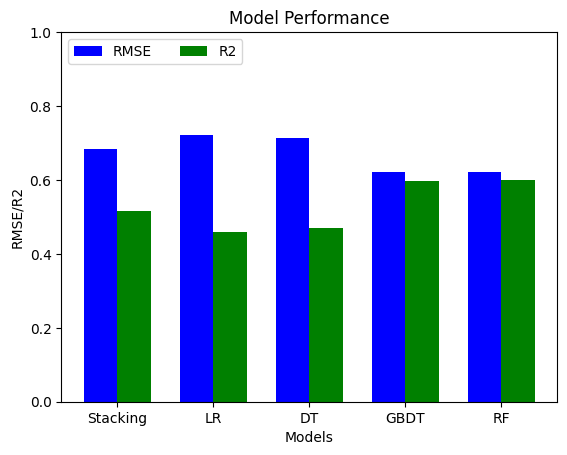

In [26]:
RMSE_Results = [stack_rmse, lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [stack_r2, lr_r2, dt_r2, gbdt_r2, rf_r2]

rg= np.arange(5)
width = 0.35

# 1. Create bar plot with RMSE results
plt.bar(rg, RMSE_Results, width, label = 'RMSE', color = 'b')

# 2. Create bar plot with R2 results
plt.bar(rg + width, R2_Results, width, label = 'R2', color = 'g')


labels = ['Stacking','LR', 'DT', 'GBDT', 'RF']
plt.xticks(rg + width/2, labels)

plt.xlabel("Models")
plt.ylabel("RMSE/R2")


plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()


<b>Analysis</b>: Compare and contrast the resulting $R^2$ and RSME scores of the ensemble models and the individual models. Are the ensemble models performing better? Which is the best performing model? Explain.

Yes the ensemble models are performing better. The RMSE is the best performing model because the stacking model combines predictions from multiple base models and provides a robust performance.